# Notebook Overview

This Jupyter Notebook performs an extensive analysis of a customer dataset from the DM2425_ABCDEats dataset. The main objectives of the notebook are to clean the data, generate new features, and perform exploratory data analysis (EDA) to gain insights into customer behavior.

## Steps and Analysis

1. **Importing Packages and Data**:
    - Essential libraries such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn` are imported.
    - The dataset is loaded from the file `DM2425_ABCDEats_DATASET.csv` into a DataFrame `df`.

2. **Initial Data Exploration**:
    - The unique values in the `customer_region` column are examined.
    - The number of rows lost by removing rows with NaN values is calculated.

3. **Data Cleaning**:
    - The initial shape of the DataFrame is stored in `s1`.
    - Rows with NaN values are dropped, and the new shape is stored in `s2`.
    - The difference in the number of rows before and after dropping NaNs is computed.

4. **Descriptive Statistics**:
    - Key statistics of the DataFrame are summarized using the `describe()` method.

5. **Feature Engineering**:
    - New features are added to the DataFrame:
        - `delta_day_order`: Time passed between the first and last order.
        - `tot_value_cui`: Total amount of money spent on the app across all options.
        - `order_freq`: Order frequency.
        - `value_freq`: Value frequency.
        - `avg_order_value`: Average order value.
    - These new features are stored in the list `new_fetures_list`.

6. **Data Validation**:
    - The presence of NaN and infinite values in the new features is checked and summarized in `df_naninf`.

7. **Exploratory Data Analysis (EDA)**:
    - Key statistics of the new features are summarized.
    - The distribution of customer age is analyzed.
    - The relationship between customer age and average order value is visualized.
    - Various plots are created to explore the relationship between customer age and other variables such as vendor count and product count.

8. **Additional Analysis**:
    - Distinct combinations of `is_chain` and `product_count` are grouped and analyzed.
    - The mean vendor count by customer age is plotted.

This notebook provides a comprehensive analysis of customer behavior, helping to identify key patterns and insights that can be used for further business decisions.

## importing packages and data


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
file_path = 'DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

### how many rows do I looose by popping NANs?

In [3]:
s1 = df.shape

In [4]:
noNaN_df = df.dropna()
s2 = noNaN_df.shape

In [5]:
s1[0]-s2[0]

1968

## Summarise key statistics for the data frame

In [6]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


## adding new key figures

In [7]:
new_fetures_list = []

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [8]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [9]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [10]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [11]:
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

### our new features

### check if I made a mess

In [21]:
nan_inf_counts_list = []

for new_feture in new_fetures_list:
    nan_count = df[new_feture].isna().sum()
    inf_count = df[new_feture].isin([np.inf, -np.inf]).sum()
    nan_inf_counts = {
        'feature:': new_feture,
        'nan_count': nan_count,
        'inf_count': inf_count
    }
    
    nan_inf_counts_list.append((new_feture, nan_count, inf_count))
    
df_naninf = pd.DataFrame( nan_inf_counts_list)
df_naninf

,0,1,2
0,delta_day_order,106,0
1,tot_value_cui,0,0
2,order_freq,106,0
3,value_freq,106,0
4,avg_order_value,0,0


In [22]:
df[new_fetures_list].describe()

,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
count,31782.000000,31888.000000,31782.000000,31782.000000,31888.000000
mean,36.409288,38.303043,0.471221,4.326917,7.538017
std,29.417128,46.412121,0.649079,8.002206,4.077059
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.887500,0.093333,0.530891,4.093646
50%,35.000000,24.140000,0.171053,1.124325,6.907083
75%,63.000000,44.990000,0.666667,3.729853,10.127569
max,91.000000,1418.330000,14.000000,141.120000,24.390000


## focus on  age

In [15]:
df['customer_age'].describe()

count    31161.000000
mean        27.506499
std          7.160898
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

<Axes: xlabel='customer_age', ylabel='avg_order_value'>

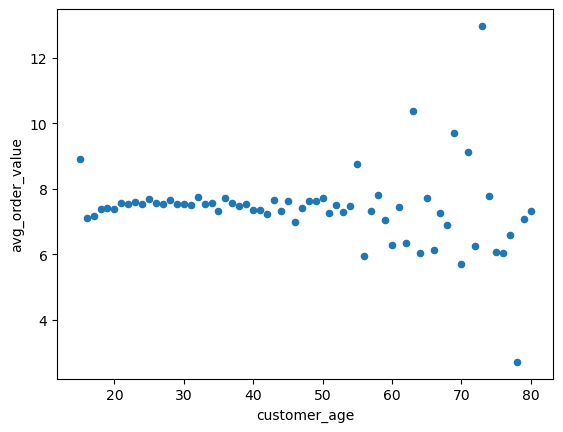

In [25]:
age_order_value_mean = df.groupby('customer_age')['avg_order_value'].mean().reset_index()
age_order_value_mean.plot(x='customer_age', y='avg_order_value', kind='scatter')


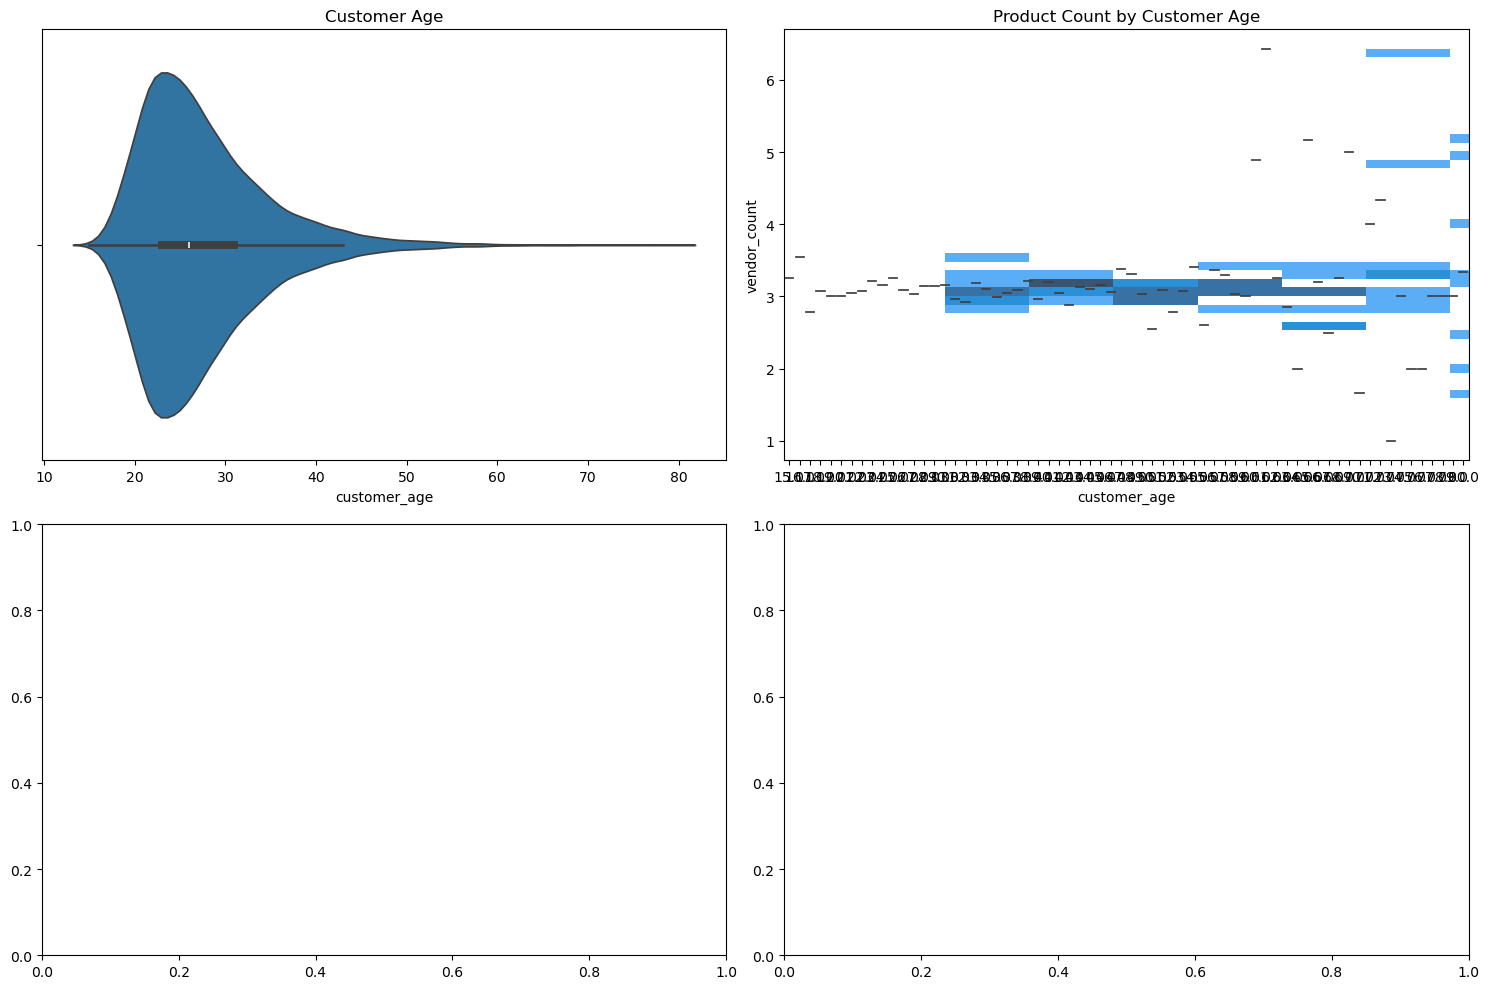

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(data=df, x='customer_age', ax=axes[0, 0])
axes[0, 0].set_title('Customer Age')

age_vendor_mean = df.groupby('customer_age')['vendor_count'].mean().reset_index()
sns.histplot(data=age_vendor_mean, x='customer_age', y='vendor_count', ax=axes[0, 1])
axes[0, 1].set_title('Vendor Count by Customer Age')


age_product_count = df.groupby('customer_age')['vendor_count'].mean().reset_index()
sns.violinplot(data=age_product_count, x='customer_age', y='vendor_count', ax=axes[0, 1])
axes[0, 1].set_title('Product Count by Customer Age')



plt.tight_layout()
plt.show()

the distribution of the customer age looks skewed, due to a high number of outliers

In [101]:
distinct_combinations = df.groupby(['is_chain', 'product_count']).size().reset_index(name='mean_product_count')
print(distinct_combinations)

     is_chain  product_count  mean_product_count
0           0              0                  81
1           0              1                1750
2           0              2                1764
3           0              3                1015
4           0              4                 513
..        ...            ...                 ...
774        73            110                   1
775        75             75                   1
776        80             88                   1
777        81            269                   1
778        83            109                   1

[779 rows x 3 columns]


<Axes: xlabel='customer_age'>

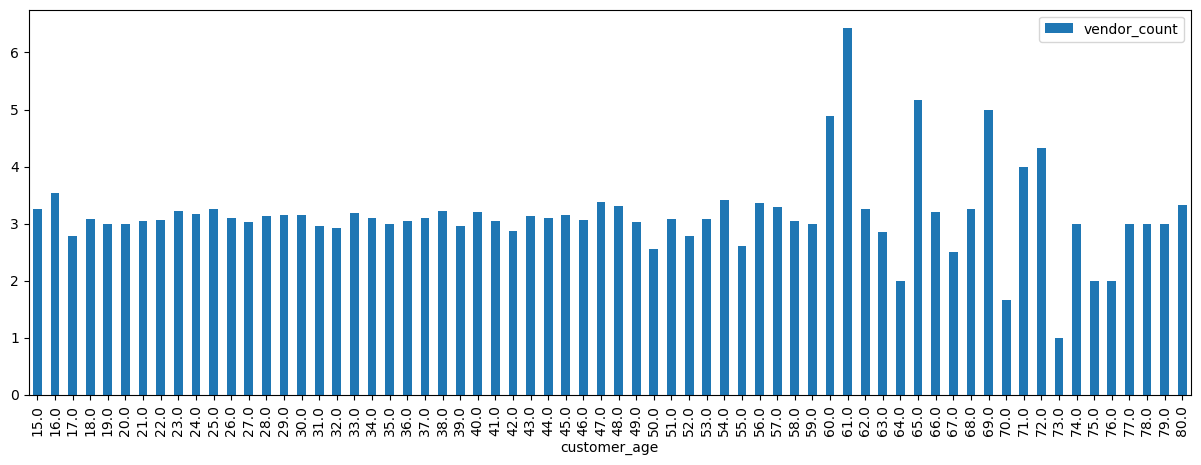

In [108]:
df.groupby("customer_age").agg({"vendor_count": "mean"}).plot(kind='bar', figsize=(15, 5))